<a href="https://colab.research.google.com/github/ShreshthaJha6/MachineLearningProjects/blob/main/image_classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#training a neural network to classify images of clothing using tensorflow.
#dataset used- FashionMNIST

#import all the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [2]:
#to load the dataset
fashion_mnist= tf.keras.datasets.fashion_mnist

#load train-60,000 and test images-10,000
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data() #returns 4 numpy arrays.

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
#set the class names
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#exploring the dataset

train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

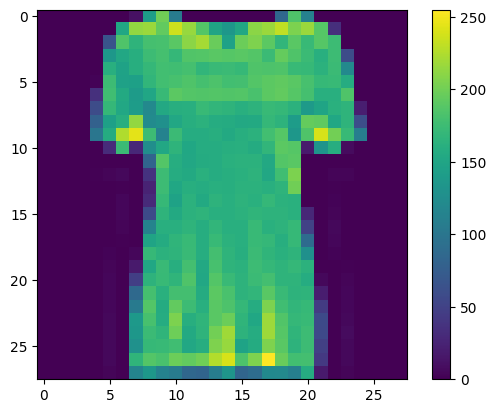

In [9]:
#show one of the images from the dataset
plt.imshow(train_images[10])
plt.colorbar()

In [10]:
#pixel values fall in the range of 0-255
#normalize this data dimensions from 0-1 to scale the images

train_images= train_images/255.0
test_images= test_images/255.0

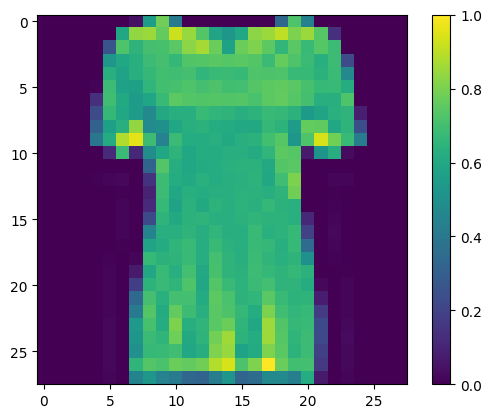

In [11]:
plt.imshow(train_images[10])
plt.colorbar()#range from 0.0 to 1.0

In [12]:
#using sequential api from tensorflow
#BUILD THE MODEL

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #transforms the image from 2D->1D 28x28= 784 pixels #reformation of the data
    #parameters from the 2 densely connected layers.
    tf.keras.layers.Dense(128, activation= 'relu'), #has 128 nodes/neurons
    tf.keras.layers.Dense(10) #returns a logits array with length 10. #the 2nd and last layer
    ####Each node contains a score that indicates the current image belongs to one of the 10 classes.
])

In [23]:
#compile the model
model.compile(optimizer='adam',  #how the model is updated based on the data and loss function
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #measures how accurately the model is training #the balue should be minimum
              metrics= ['accuracy'] #to check training and testing you need a metric
)

In [24]:
#TRAIN THE MODEL

model.fit(train_images, train_labels, epochs=10)
#model reached accuracy of 815 on training data

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6606 - accuracy: 0.8180
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5390 - accuracy: 0.8475
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5098 - accuracy: 0.8561
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5024 - accuracy: 0.8586
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4959 - accuracy: 0.8603
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4867 - accuracy: 0.8628
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4845 - accuracy: 0.8642
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4787 - accuracy: 0.8683
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4778 - accuracy: 0.8667
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.474

In [25]:
#check on test dataset
test_loss, test_accuracy= model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy: ", test_accuracy*100,"%")

313/313 - 1s - loss: 0.5225 - accuracy: 0.8498 - 632ms/epoch - 2ms/step
Test accuracy:  84.97999906539917 %


Text(0, 0.5, 'Learning Rate')

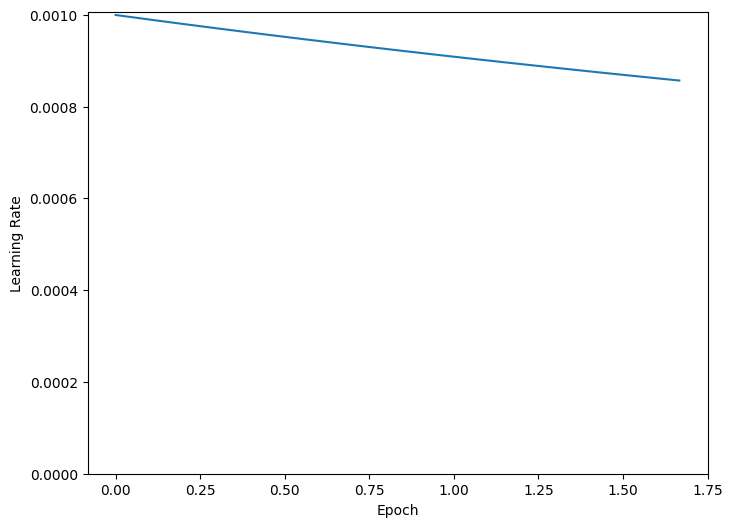

In [16]:
#test accuracy is lesser than training accuracy.
#OVERFITTING has occured where the model has "memorized" the training data noise to the point that it is not able to perform well on previously _unseen_ data

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=60000*10,
  decay_rate=1,
  staircase=False)

step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/60000, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

In [31]:
#applying l2 regularization to prevent overfitting.

l2_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])

In [32]:
l2_model.compile(optimizer='adam',  #how the model is updated based on the data and loss function
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #measures how accurately the model is training #the balue should be minimum
              metrics= ['accuracy'] #to check training and testing you need a metric
)

In [33]:
l2_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5307 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4144 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3873 - accuracy: 0.8741
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3722 - accuracy: 0.8800
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3613 - accuracy: 0.8855
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3546 - accuracy: 0.8879
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3458 - accuracy: 0.8917
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3417 - accuracy: 0.8937
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3374 - accuracy: 0.8954
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.33

In [34]:
test_loss, test_accuracy= l2_model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy: ", test_accuracy*100,"%")
#with this we have reduced the overfitting effects. While not compromising over the performance of the model.

313/313 - 1s - loss: 0.4043 - accuracy: 0.8748 - 736ms/epoch - 2ms/step
Test accuracy:  87.48000264167786 %


In [37]:
#making predictions

#adding a softmax layer to conver the linear outputs of models into probabilities
probability_model= tf.keras.Sequential([l2_model, tf.keras.layers.Softmax()])

predictions= probability_model.predict(test_images)

313/313 [==============================] - 2s 4ms/step


In [38]:
predictions[0]
#A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing

array([1.2520357e-05, 3.2504241e-07, 1.5663354e-06, 3.1557775e-07,
       1.1574912e-05, 2.7652921e-02, 1.0536946e-05, 1.4302343e-01,
       1.0899938e-04, 8.2917774e-01], dtype=float32)

In [39]:
#to check which label has the highest probability
np.argmax(predictions[0])

9

In [44]:
#functions to plot the image and the prediction

def plot_image(i, predictions_array, true_label, img):
  true_label, img= true_label[i], img[i];
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label= np.argmax(predictions_array)
  if(predicted_label==true_label):
    color='blue'
  else:
    color='red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),
                                class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label= true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot= plt.bar(range(10), predictions_array, color="#FF0000")
  plt.ylim([0,1])
  predicted_label= np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

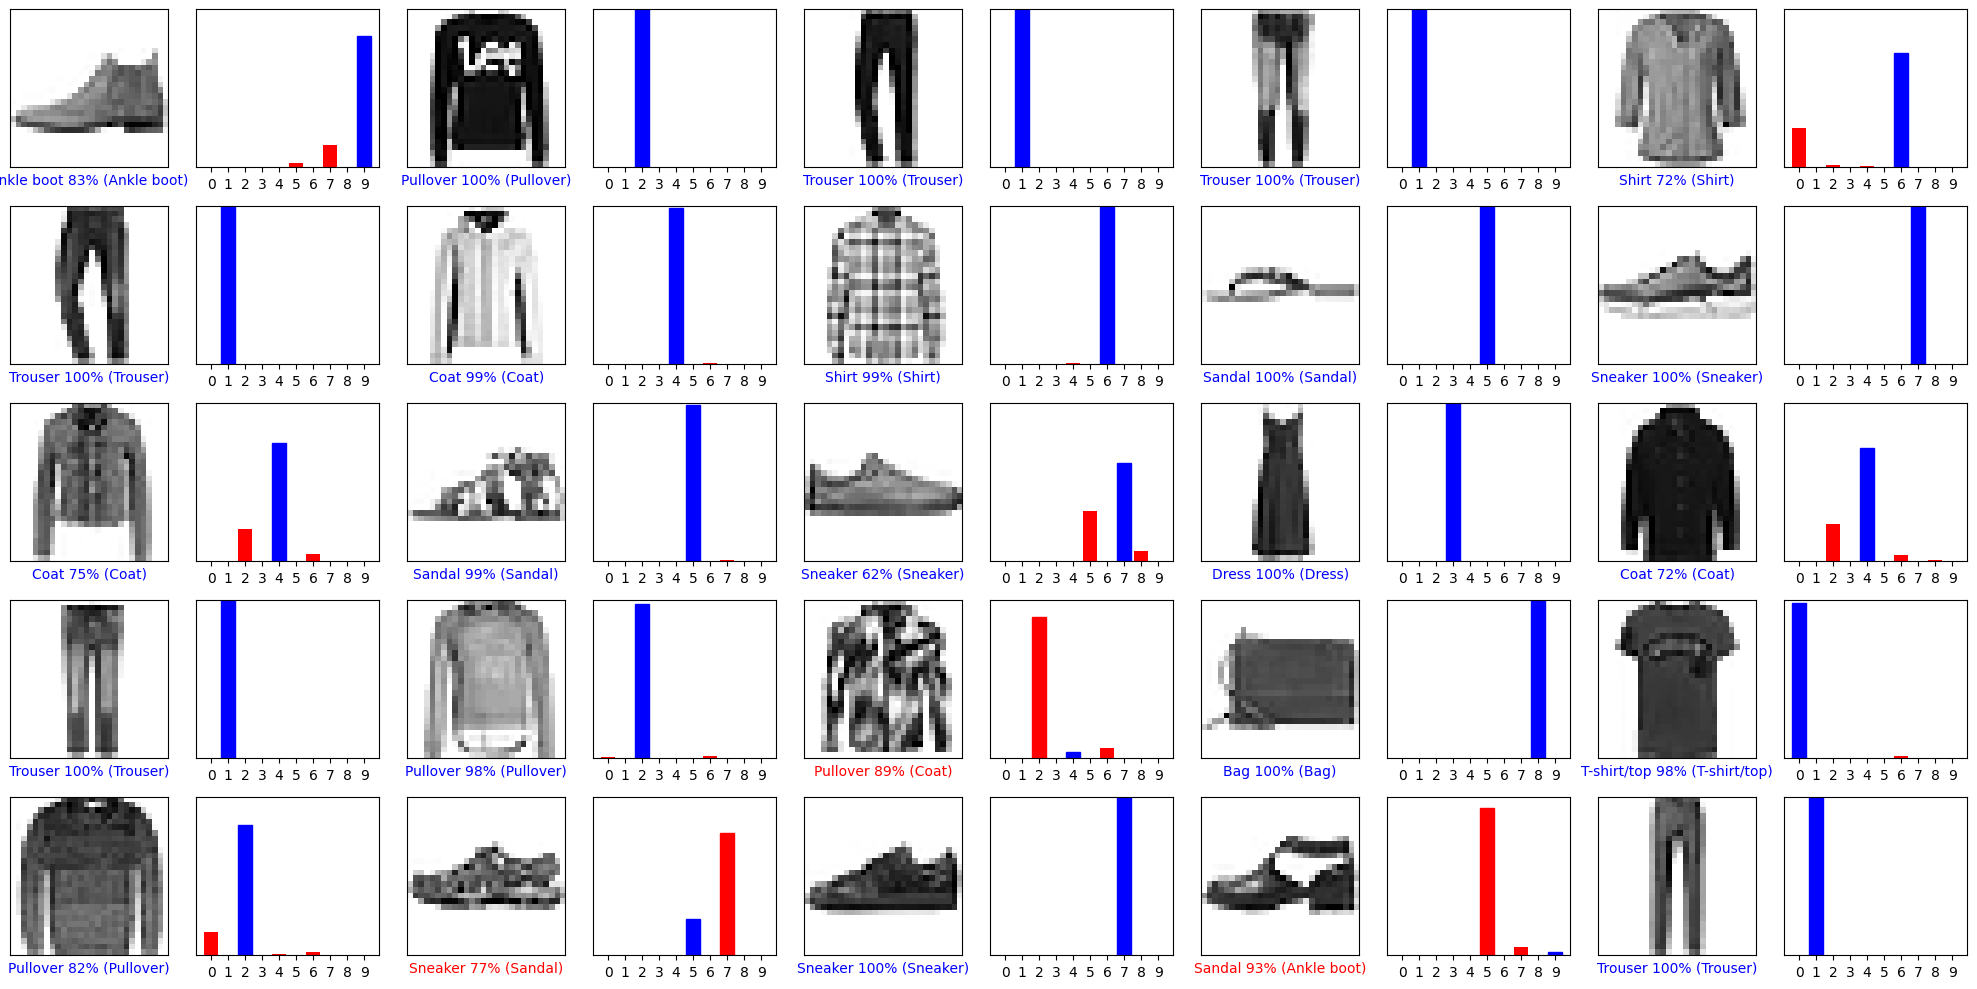

In [46]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [47]:
img= test_images[5]
img = (np.expand_dims(img,0)) # Add the image to a batch where it's the only member.
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 32ms/step
[[6.37902340e-05 9.99934912e-01 1.06413715e-07 2.41123360e-07
  6.47107356e-07 8.37019165e-09 3.22480872e-07 7.94176738e-11
  3.81730167e-08 1.75173365e-11]]


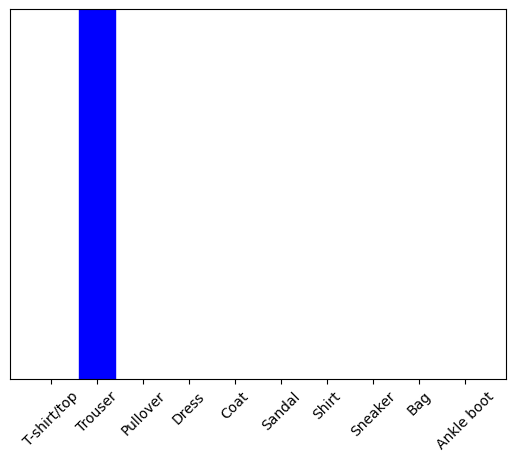

In [48]:
plot_value_array(5, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [49]:
np.argmax(predictions_single[0])

1